<a href="https://colab.research.google.com/github/PolinaBoeva/AI_hw7_Fraud_detection/blob/main/%D0%91%D0%BE%D0%B5%D0%B2%D0%B0_%22ML_AI24_HT7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [ ]:
# !wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
# !wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
# !wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
# !wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
# !wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

In [ ]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
import pandas as pd
import os
from tqdm import tqdm

INPUT_DIR = '/content/'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

In [ ]:
df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
del train_transaction, train_identity

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')
del test_transaction, test_identity

In [ ]:
# df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
# df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
# df_train.shape, df_test.shape

In [ ]:
# object_cols = []
# for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
#     if df_train[col].dtype == 'O':
#       object_cols.append(idx)

In [ ]:
# X_train = df_train.drop('isFraud', axis=1)
# X_train = X_train.fillna('')
# y_train = df_train['isFraud'].values

# cb = CatBoostClassifier(iterations=3)
# cb.fit(X_train, y_train, object_cols, )

In [ ]:
# predictions = cb.predict_proba(df_test.fillna(''))

In [ ]:
# sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 0]})
# sub.head()

In [ ]:
# # Сохранение submission
# sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

In [ ]:
# чуть-чуть изменила код отсюда: https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=Iz376nU4RqnN
import numpy as np
import pandas as pd
from tqdm import tqdm

def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    NAlist = []

    for col in tqdm(df.columns):
        # Если небольшое количество уникальных значений, то тип category
        if df[col].dtype == object:
            # if df[col].nunique() / len(df) < 0.5:
            #     df[col] = df[col].astype("category")
            continue

        IsInt = False
        col_min_value = df[col].min()
        col_max_value = df[col].max()

        if not np.isfinite(df[col]).all():
            NAlist.append(col)
            df[col].fillna(np.nan, inplace=True)

        if (df[col] % 1 == 0).all():
            IsInt = True

        if IsInt:
            if col_min_value >= 0:
                if col_max_value < 255:
                    df[col] = df[col].astype(np.uint8)
                elif col_max_value < 65535:
                    df[col] = df[col].astype(np.uint16)
                elif col_max_value < 4294967295:
                    df[col] = df[col].astype(np.uint32)
            else:
                if col_min_value >= np.iinfo(np.int8).min and col_max_value <= np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif col_min_value >= np.iinfo(np.int16).min and col_max_value <= np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif col_min_value >= np.iinfo(np.int32).min and col_max_value <= np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
        else:
            df[col] = df[col].astype(np.float32)

    end_mem = df.memory_usage().sum() / 1024**2
    print(f"Память уменьшена с {start_mem:.2f} MB до {end_mem:.2f} MB ({100 * (start_mem - end_mem) / start_mem:.1f}%)")

    return df, NAlist

In [ ]:
df_train, NAlist_train = reduce_mem_usage(df_train)
df_test, NAlist_test = reduce_mem_usage(df_test)

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

In [ ]:
# Переведем object в category, а также категориальные столбцы, которые были обозначены как числовые
for i in df_train.select_dtypes(include='object').columns:
    df_train[i] = df_train[i].astype('category')
    df_test[i] = df_test[i].astype('category')
cat_col = ['addr1', 'addr2', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6']
for col in cat_col:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

In [ ]:
df_train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,4.175590e+05,417559.000000,4.175590e+05,417559.000000,159468.000000,29286.000000,417559.000000,417559.000000,417559.000000,417559.000000,...,107259.000000,34269.000000,107226.000000,107209.000000,3950.000000,3954.000000,3624.000000,3930.000000,3948.000000,62116.000000
mean,3.195779e+06,0.035255,4.976936e+06,134.666550,124.795799,239.833099,15.878633,17.381448,0.005697,5.053604,...,187.936417,14.172546,352.299591,400.498535,371.863037,15.991148,12.790563,328.534363,148.645645,26.635328
std,1.205390e+05,0.184424,3.099220e+06,238.153122,381.758911,538.288086,154.581684,179.413789,0.152001,78.368275,...,30.113295,1.479074,140.257675,150.430756,200.187790,6.891225,2.189365,98.819893,32.355930,3.786288
min,2.987000e+06,0.000000,8.640000e+04,0.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.091390e+06,0.000000,2.072820e+06,42.950001,3.000000,7.000000,1.000000,1.000000,0.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.195779e+06,0.000000,4.822648e+06,68.949997,9.000000,36.000000,1.000000,1.000000,0.000000,0.000000,...,166.000000,15.000000,341.000000,469.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,3.300168e+06,0.000000,7.786364e+06,125.000000,25.000000,225.000000,3.000000,3.000000,0.000000,1.000000,...,225.000000,15.000000,427.000000,521.000000,500.000000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.404558e+06,1.000000,1.054080e+07,31937.390625,10286.000000,11623.000000,4685.000000,5691.000000,24.000000,2253.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
df_train.describe(include='category')

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,417559,417559,410996.0,416738.0,416730,414578.0,416733,369586.0,369586.0,352649,...,62096,107961,57819,62168,108273,108273,108273,108273,108124,91959
unique,5,12275,500.0,105.0,4,110.0,4,318.0,67.0,59,...,71,110,183,4,2,2,2,2,2,1551
top,W,7919,321.0,150.0,visa,226.0,debit,299.0,87.0,gmail.com,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
freq,301297,10407,33988.0,366862.0,272753,209561.0,306554,33218.0,365944.0,160974,...,16078,21821,13466,46931,62152,102536,84398,57779,66324,36841


In [ ]:
df_train['TransactionDT']

,TransactionDT
0,86400
1,86401
2,86469
3,86499
4,86506
...,...
417554,10540759
417555,10540766
417556,10540775
417557,10540789


In [ ]:
# Удаляем столбцы df_train, где более 20% значений пропущены
threshold = 0.2

df_train = df_train.loc[:, df_train.isna().mean() < threshold]

In [ ]:
df_test = df_test[df_train.drop(columns='isFraud').columns]

In [ ]:
missing_values = df_train.isna().sum()

# Отфильтровываем столбцы, где пропуски больше 0
missing_values = missing_values[missing_values > 0]
missing_values

,0
card2,6563
card3,821
card4,829
card5,2981
card6,826
...,...
V317,12
V318,12
V319,12
V320,12


In [ ]:
# уникальные значения в категориальных столбцах
df_train.select_dtypes(include='category').nunique()

,0
ProductCD,5
card1,12275
card2,500
card3,105
card4,4
card5,110
card6,4
addr1,318
addr2,67
P_emaildomain,59


In [ ]:
# Большое количество пропусков в столбце P_emaildomain. Одинаоквое количество пропусков в addr1 addr2 вероятно нет данных по одинаковым событиям
df_train.select_dtypes(include='category').isna().sum()

,0
ProductCD,0
card1,0
card2,6563
card3,821
card4,829
card5,2981
card6,826
addr1,47973
addr2,47973
P_emaildomain,64910


In [ ]:
df_train.card4.value_counts()

,count
card4,
visa,272753
mastercard,132403
american express,6765
discover,4809


In [ ]:
df_train.card6.value_counts()

,count
card6,
debit,306554
credit,110134
debit or credit,30
charge card,15


In [ ]:
# Заменим пропуски в категориальных столбцах классом missing
for col in df_train.select_dtypes(include='category').columns:
    df_train[col] = df_train[col].cat.add_categories('missing')
    df_test[col] = df_test[col].cat.add_categories('missing')
    df_train[col].fillna('missing', inplace=True)
    df_test[col].fillna('missing', inplace=True)

<ipython-input-26-88ae88adec62>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna('missing', inplace=True)
<ipython-input-26-88ae88adec62>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

isFraud
0    402838
1     14721
Name: count, dtype: int64


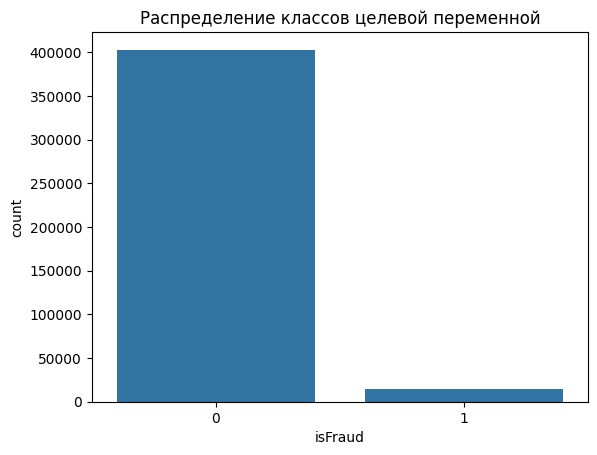

In [ ]:
# Проверка целевой переменной. Дисбаланс классов
class_count = df_train['isFraud'].value_counts()
print(class_count)
# Столбчатая диаграмма для целевой переменной
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x=df_train['isFraud'])
plt.title('Распределение классов целевой переменной')
plt.show()

In [ ]:
df_train.shape

(417559, 182)

In [ ]:
# В данных есть полные дубли без колонок 'TransactionDT' 'TransactionID'. Обучение будет без этих столбцов так, что удалим дубликаты
# Определяем дубликаты без учета 'TransactionDT' и 'TransactionID'
duplicates_mask = df_train.drop(columns=['TransactionDT', 'TransactionID']).duplicated()

# Удаляем найденные дубликаты, но сохраняем все столбцы
df_train = df_train[~duplicates_mask]

# Проверим, сколько дубликатов удалено
print(f"Удалено {duplicates_mask.sum()} полных дубликатов")

Удалено 8043 полных дубликатов


In [ ]:
# Корреляции с тагретом
isFraud_corr = df_train.select_dtypes(exclude='category').corr()['isFraud'].sort_values(ascending=False)
isFraud_corr = isFraud_corr.drop('isFraud')

isFraud_corr

,isFraud
V87,0.248542
V86,0.246079
V79,0.196427
V18,0.183799
V17,0.183071
...,...
V69,-0.107875
V91,-0.108570
V29,-0.111380
V90,-0.112605


In [ ]:
# Спрашивала у гпт
# выведем стобцы с высокой корреляцией 0,8 и больше
corr_matrix = df_train.select_dtypes(exclude=['category']).corr().abs()
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

high_corr_pairs = (
    corr_matrix.where(upper_triangle)
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Фильтруем только корреляции выше 0.8
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.8]

# Группируем по Feature1, объединяя Feature2 и корреляции в строки
grouped_corr = high_corr_pairs.groupby('Feature1').agg({
    'Feature2': lambda x: ', '.join(x),  # Список коррелирующих переменных
    'Correlation': lambda x: ', '.join(map(lambda v: f"{v:.3f}", x))  # Список корреляций
}).reset_index()

grouped_corr

,Feature1,Feature2,Correlation
0,C1,"C2, C4, C6, C7, C8, C10, C11, C12, C13, C14","0.996, 0.976, 0.986, 0.951, 0.977, 0.969, 0.99..."
1,C10,"C11, C12, C14","0.969, 0.989, 0.891"
2,C11,"C12, C13, C14","0.945, 0.821, 0.970"
3,C12,C14,0.854
4,C13,C14,0.906
...,...,...,...
100,V93,"V94, V302, V304","0.857, 0.832, 0.809"
101,V95,V101,0.813
102,V96,"V97, V102","0.818, 0.824"
103,V97,V103,0.817


In [ ]:
# Нет в grouped_corr высокой корреляции с таргетом
grouped_corr[grouped_corr['Feature1'] == 'isFraud']

,Feature1,Feature2,Correlation


In [ ]:
# Много сильно коррелированных переменных. Большинство V коррелировано между собой и D - выглядят как дамми переменные.
# Оставим только 1 переменную, если корреляция между двумя больше 0,85. Отсавляем ту переменную, где корреляция с таргетом больше
# Оставим также TransactionDT (для дальнейшего деления на фолды)
to_drop = set()
columns = corr_matrix.columns

isFraud_corr = df_train.select_dtypes(exclude=['category']).corr()['isFraud'].abs()

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.iloc[i, j] > 0.85:
            col1 = columns[i]
            col2 = columns[j]

            if isFraud_corr[col1] > isFraud_corr[col2]:
                # Если col1 имеет большую корреляцию с isFraud, то удаляем col2
                to_drop.add(col2)
            else:
                # Если col2 имеет большую корреляцию с isFraud, то удаляем col1
                to_drop.add(col1)

to_drop.discard('TransactionDT')
df_train_cut = df_train.drop(columns=to_drop)

print(f"Удалены признаки: {to_drop}")
print(f"Новый размер df_train: {df_train_cut.shape}")

Удалены признаки: {'V29', 'V21', 'C10', 'V82', 'V292', 'V127', 'V80', 'V74', 'V32', 'V91', 'V311', 'V113', 'V129', 'V304', 'V69', 'C11', 'V60', 'V94', 'V71', 'V34', 'V73', 'V22', 'V125', 'V81', 'C5', 'V86', 'V112', 'V30', 'V131', 'V318', 'C6', 'V76', 'C12', 'V314', 'V295', 'V15', 'V298', 'V291', 'V61', 'V27', 'V317', 'V54', 'C13', 'V319', 'V13', 'V302', 'V137', 'V70', 'V68', 'C4', 'V58', 'C8', 'V288', 'V84', 'V92', 'V294', 'V119', 'V85', 'V303', 'V93', 'V293', 'V72', 'C7', 'V63', 'V126', 'V19', 'V28', 'V135', 'V321', 'V59', 'C1', 'V313', 'V57', 'V16', 'V33', 'V300', 'C14', 'V64', 'V31', 'V307', 'V17'}
Новый размер df_train: (409516, 101)


In [ ]:
# Посмотрим на корреляцию с таргетом
# Наибольшая положительная корреляция с V87, отрицательная с V90
isFraud_corr = df_train_cut.select_dtypes(exclude='category').corr()['isFraud'].sort_values(ascending=False)

isFraud_corr = isFraud_corr.drop('isFraud')

isFraud_corr

,isFraud
V87,0.248542
V79,0.196427
V18,0.183799
V23,0.158112
V78,0.153481
...,...
D1,-0.065558
D10,-0.068478
D15,-0.075509
V90,-0.112605


In [ ]:
# Столбец, где все значения 1, для построения моделей он не нужен
print(df_train_cut['V107'].value_counts())
df_train_cut = df_train_cut.drop(columns='V107')

V107
1    409516
Name: count, dtype: int64


In [ ]:
# Взаимосвязь целевой переменной с категориальными переменными
# Мера крамера указывает на несильную зависимость категориальных переменных таргетом
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

for i in df_train_cut.select_dtypes(include='category').columns:
    print(f'v Cramer for {i}: {cramers_v(df_train_cut[i], df_train_cut["isFraud"])}')

v Cramer for ProductCD: 0.16135802826668952
v Cramer for card1: 0.36292409382723434
v Cramer for card2: 0.22461493773258695
v Cramer for card3: 0.16982964563910188
v Cramer for card4: 0.019236439579757066
v Cramer for card5: 0.12496280884206709
v Cramer for card6: 0.10023556225866118
v Cramer for addr1: 0.16942334418058672
v Cramer for addr2: 0.1623715655217173
v Cramer for P_emaildomain: 0.08468187869466483


• card1 (0.36) имеет наибольшую связь с target → важный признак.

• card2 (0.22), addr1 (0.17), card3 (0.17), addr2 (0.16), ProductCD (0.16) → средняя связь.

In [ ]:
# Количество уникальных значений в столбцах
for i in df_train_cut.columns:
    print(f'unique values in {i}: {df_train_cut[i].nunique()}')

unique values in TransactionID: 409516
unique values in isFraud: 2
unique values in TransactionDT: 396813
unique values in TransactionAmt: 16024
unique values in ProductCD: 5
unique values in card1: 12275
unique values in card2: 501
unique values in card3: 106
unique values in card4: 5
unique values in card5: 111
unique values in card6: 5
unique values in addr1: 319
unique values in addr2: 68
unique values in P_emaildomain: 60
unique values in C2: 1041
unique values in C3: 23
unique values in C9: 203
unique values in D1: 640
unique values in D10: 754
unique values in D15: 790
unique values in V12: 4
unique values in V14: 2
unique values in V18: 16
unique values in V20: 15
unique values in V23: 14
unique values in V24: 14
unique values in V25: 7
unique values in V26: 13
unique values in V53: 6
unique values in V55: 18
unique values in V56: 20
unique values in V62: 8
unique values in V65: 2
unique values in V66: 6
unique values in V67: 9
unique values in V75: 5
unique values in V77: 31
u

In [ ]:
# Выведем столбцы, где присутствуют выбросы
numeric_cols = df_train_cut.select_dtypes(exclude=['category'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

outliers_count = outliers_mask.sum()
outliers_count = outliers_count[outliers_count > 0].sort_values(ascending=False)

print("Выбросы в столбцах:")
print(outliers_count)

Выбросы в столбцах:
V97     92013
V128    92013
V287    83673
V312    83673
V62     76825
        ...  
V65        92
V53        74
D15        70
V12        47
V305        3
Length: 88, dtype: int64


In [ ]:
# Проанализируем столбцы с выбросами:
# Много столбцов с одинаковым количеством выбросов, большое количество строк с 0 или 1 значениями. Как например в V312.
# В данном случае не типичные значения могут нести в себе важную информацию, нехарактерную для простого пользователя, а значит указывать на фрод.
# Выбросы в таких столбцах трогать не будем.
# есть также столбцы с ограниченным количеством категорий как V20. В них выбросы также не трогаем
# Остаются столбцы сумма транзакций и  addr1 (категориальный, надо поменять тип).
# В данной задаче не будем удалять выбросы так, как они могут нести в себе смысл
for col in outliers_count.index:
    print(f"\nValue counts in {col}:")
    print(df_train_cut[col].value_counts())

<Figure size 1100x800 with 0 Axes>

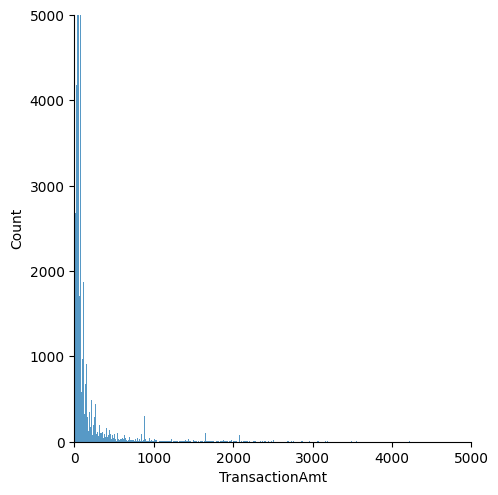

In [ ]:
# Проанализируем TransactionAmt
plt.figure(figsize=(11, 8))
sns.displot(df_train_cut['TransactionAmt'])
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.show()

In [ ]:
df_train_cut['TransactionAmt_log'] = np.log1p(df_train_cut['TransactionAmt'])
df_test['TransactionAmt_log'] = np.log1p(df_test['TransactionAmt'])

<ipython-input-41-7414102727e7>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['TransactionAmt_log'] = np.log1p(df_test['TransactionAmt'])


<Figure size 1100x800 with 0 Axes>

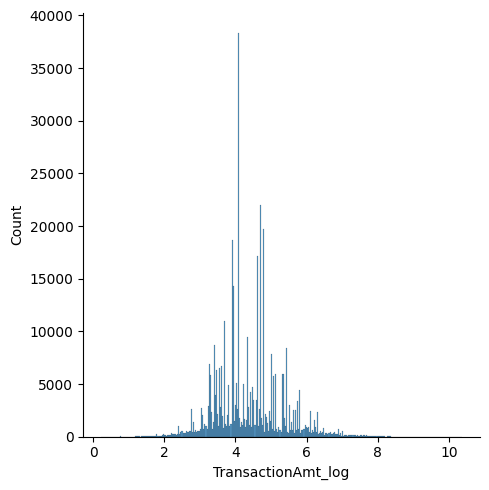

In [ ]:
plt.figure(figsize=(11, 8))
sns.displot(df_train_cut['TransactionAmt_log'])
plt.show()

In [ ]:
# Скопировала код из: https://colab.research.google.com/drive/1pg1xZa8koJeUaZA35e7g1ISGqNlHDHZW#scrollTo=K6YO7UYZom4c
# Генерация признаков, отвечающие за среднюю, медианную, максимальную и минимальную суммы покупок для каждой категории в 'card1' и 'card2'.
new_cols = []
for col in ['card1', 'card2']:
    for agg_type in ['mean', 'median', 'min', 'max']:
        agg_col_name = 'TransactionAmt{}_{}'.format(col, agg_type)
        card_agg = df_train_cut.groupby(col)['TransactionAmt'].agg([agg_type]).rename({agg_type: agg_col_name}, axis=1)
        df_train_cut = df_train_cut.merge(card_agg, how='left', on=col)
        df_test = df_test.merge(card_agg, how='left', on=col)
        new_cols.append(agg_col_name)

<ipython-input-43-f9f93ead3093>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_agg = df_train_cut.groupby(col)['TransactionAmt'].agg([agg_type]).rename({agg_type: agg_col_name}, axis=1)
<ipython-input-43-f9f93ead3093>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_agg = df_train_cut.groupby(col)['TransactionAmt'].agg([agg_type]).rename({agg_type: agg_col_name}, axis=1)
<ipython-input-43-f9f93ead3093>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the 

In [ ]:
df_train_cut = df_train_cut.drop(columns='TransactionAmt')
df_test = df_test.drop(columns='TransactionAmt')

In [ ]:
df_train_cut

,TransactionID,isFraud,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,...,V320,TransactionAmt_log,TransactionAmtcard1_mean,TransactionAmtcard1_median,TransactionAmtcard1_min,TransactionAmtcard1_max,TransactionAmtcard2_mean,TransactionAmtcard2_median,TransactionAmtcard2_min,TransactionAmtcard2_max
0,2987000,0,86400,W,13926,missing,150.0,discover,142.0,credit,...,0.0,4.241327,368.656219,150.000000,40.000000,1343.140015,179.433853,82.000000,5.000,3069.250000
1,2987001,0,86401,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.0,3.401197,243.970337,108.949997,10.000000,6085.229980,229.458862,108.949997,5.000,6085.229980
2,2987002,0,86469,W,4663,490.0,150.0,visa,166.0,debit,...,0.0,4.094345,96.598503,59.000000,12.500000,994.000000,134.176270,77.000000,0.424,6450.970215
3,2987003,0,86499,W,18132,567.0,150.0,mastercard,117.0,debit,...,0.0,3.931826,123.655334,67.949997,6.000000,3190.000000,132.196442,77.949997,6.000,3190.000000
4,2987004,0,86506,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,3.931826,105.083336,108.949997,30.000000,200.000000,221.900864,107.000000,5.000,31937.390625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409511,3404554,0,10540759,W,2538,476.0,150.0,visa,166.0,debit,...,0.0,5.817111,106.670151,67.949997,15.000000,2247.469971,100.889687,59.000000,5.000,2681.000000
409512,3404555,0,10540766,W,6019,583.0,150.0,visa,226.0,credit,...,0.0,5.084505,228.442200,108.949997,4.575000,5094.950195,228.946838,108.500000,4.575,5094.950195
409513,3404556,0,10540775,C,5059,138.0,200.0,visa,226.0,debit,...,0.0,5.442760,167.987503,192.679001,80.962997,230.078995,61.385963,41.743000,4.547,250.000000
409514,3404557,0,10540789,W,6697,111.0,150.0,visa,195.0,debit,...,0.0,4.663439,287.437439,150.000000,15.000000,3081.969971,149.734253,87.949997,3.500,4301.950195


In [ ]:
max_value = df_train_cut.select_dtypes(exclude='category').max().max()
max_value

10540797.0

In [ ]:
min_value = df_train_cut.select_dtypes(exclude='category').min().min()
min_value

-83.0

Выводы по EDA: В данных много пропусков, удалила столбцы с большим количеством, но не обрабатывала оставшиеся так, как CatBoost, LightGBM, XGBoost умеют работать с пропусками (возможно заменить большим числом, но качечтво получается меньше, я пробовала). Для категориальных столбцов добавила 'missing' на место пропусков.

Отобрала через корреляцию переменные, убрала сильно зависимые, чтобы снизить мультиколлинеарность, оставила наиболее коллерированные с таргетом.

Добавила колонки отвечающие за среднюю, медианную, максимальную и минимальную суммы покупок для каждой категории в 'card1' и 'card2'.

Проанализировала выбросы и приняла решение не обрабатывать их, поскольку в текущей задаче атипичные значения могут указывать на фрод.

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

In [ ]:
# Фолды для кросс валидации. Скопировала: https://colab.research.google.com/drive/1pg1xZa8koJeUaZA35e7g1ISGqNlHDHZW#scrollTo=2MpZ6Mb0ox88
month_length = 3600 * 24 * 30
fold0_idx = df_train_cut[df_train_cut['TransactionDT'] < df_train_cut['TransactionDT'].min() + month_length].index
fold1_idx = df_train_cut[(df_train_cut['TransactionDT'].min() + month_length <= df_train_cut['TransactionDT']) & (df_train_cut['TransactionDT'] < df_train_cut['TransactionDT'].min() + 2 * month_length)].index
fold2_idx = df_train_cut[(df_train_cut['TransactionDT'].min() + 2 * month_length <= df_train_cut['TransactionDT']) & (df_train_cut['TransactionDT'] < df_train_cut['TransactionDT'].min() + 3 * month_length)].index
fold3_idx = df_train_cut[df_train_cut['TransactionDT'].min() + 3 * month_length <= df_train_cut['TransactionDT']].index
folds_idx = [fold0_idx, fold1_idx, fold2_idx, fold3_idx]

In [ ]:
cat_features = df_train_cut.select_dtypes(include=['category']).columns

for col in cat_features:
    df_test[col] = df_test[col].astype('category')

for col in cat_features:
    df_test[col] = df_test[col].cat.set_categories(df_train_cut[col].cat.categories)

df_train_cut = df_train_cut.drop(columns=['TransactionDT', 'TransactionID'])

df_test = df_test[df_train_cut.drop(columns='isFraud').columns]

In [ ]:
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'n_estimators': 2000,
    'seed': 13,
    'early_stopping_rounds': 200,
}

scores = []

feature_importances = pd.DataFrame()
feature_importances['feature'] = df_train_cut.columns.drop('isFraud')

test_preds = []

for i in range(len(folds_idx)):
    X_train = df_train_cut.drop(folds_idx[i], axis=0)
    y_train = X_train['isFraud'].values
    X_val = df_train_cut.iloc[folds_idx[i]]
    y_val = X_val['isFraud'].values
    X_train = X_train.drop('isFraud', axis=1)
    X_val = X_val.drop('isFraud', axis=1)

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    lgb_model = lgb.train(params, lgb_train, valid_sets=lgb_eval)

    feature_importances['fold_{}'.format(i)] = lgb_model.feature_importance()

    y_pred = lgb_model.predict(X_val)
    score_fold = roc_auc_score(y_val, y_pred)
    scores.append(score_fold)
    y_test_pred = lgb_model.predict(df_test)
    test_preds.append(y_test_pred)

for i in range(len(scores)):
    print('Fold {}, AUC-ROC: {:.5f}'.format(i, scores[i]))
print('CV AUC-ROC: {:.5f}'.format(np.mean(scores)))

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11240, number of negative: 266729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.207823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13761
[LightGBM] [Info] Number of data points in the train set: 277969, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040436 -> initscore=-3.166754
[LightGBM] [Info] Start training from score -3.166754
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[525]	valid_0's auc: 0.859022


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11077, number of negative: 310517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.231315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14099
[LightGBM] [Info] Number of data points in the train set: 321594, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034444 -> initscore=-3.333368
[LightGBM] [Info] Start training from score -3.333368
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[298]	valid_0's auc: 0.905613


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 10979, number of negative: 307852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.234459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14137
[LightGBM] [Info] Number of data points in the train set: 318831, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034435 -> initscore=-3.333635
[LightGBM] [Info] Start training from score -3.333635
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.903433


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 10627, number of negative: 299527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.231473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14142
[LightGBM] [Info] Number of data points in the train set: 310154, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034264 -> initscore=-3.338807
[LightGBM] [Info] Start training from score -3.338807
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.882093
Fold 0, AUC-ROC: 0.85902
Fold 1, AUC-ROC: 0.90561
Fold 2, AUC-ROC: 0.90343
Fold 3

In [ ]:
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3
0,ProductCD,60,40,31,17
1,card1,3394,2508,1267,698
2,card2,327,200,102,58
3,card3,45,30,17,1
4,card4,0,0,0,0


In [ ]:
fold_cols = [col for col in feature_importances.columns if col.startswith('fold_')]
feature_importances['average'] = feature_importances[fold_cols].mean(axis=1)
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3,average
0,ProductCD,60,40,31,17,37.00
1,card1,3394,2508,1267,698,1966.75
2,card2,327,200,102,58,171.75
3,card3,45,30,17,1,23.25
4,card4,0,0,0,0,0.00


<ipython-input-72-38e95bf7c8d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")


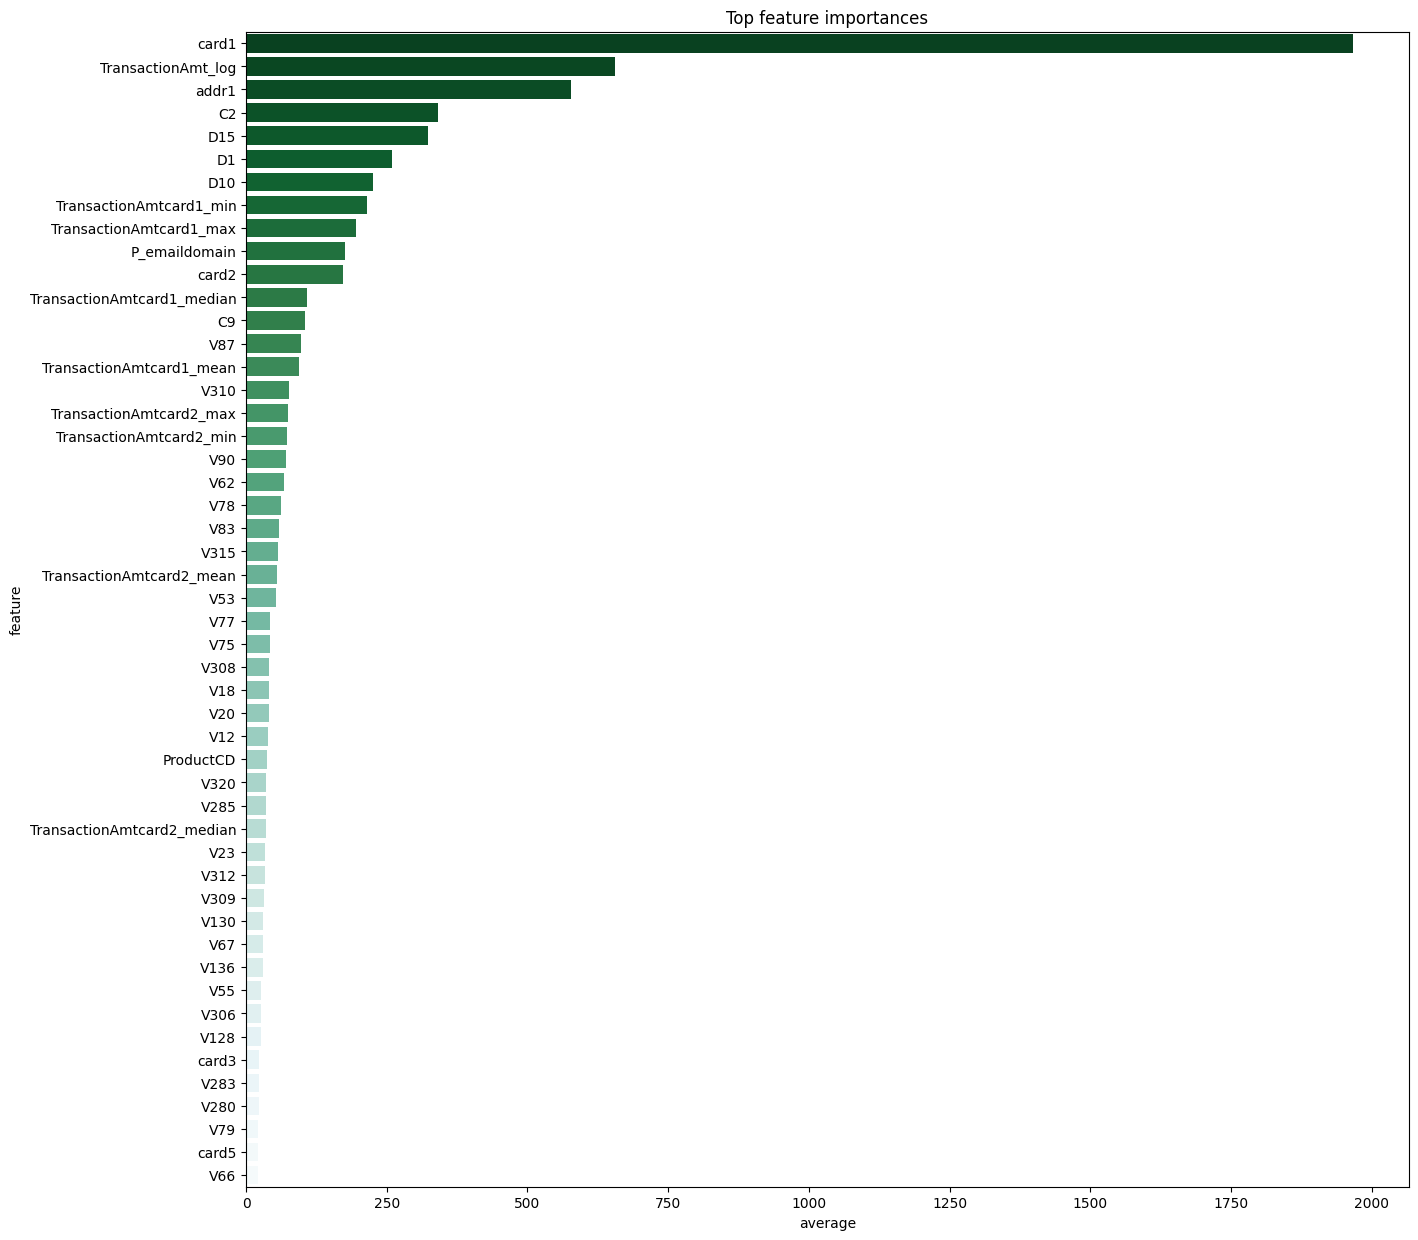

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")
plt.title('Top feature importances')
plt.show()

In [ ]:
final_pred = np.average(test_preds, axis=0)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': final_pred})
sub.to_csv('submission_lgb_fe.csv', index=False)

In [ ]:
sub

,TransactionID,isFraud
0,3404559,0.003135
1,3404560,0.010284
2,3404561,0.003931
3,3404562,0.001994
4,3404563,0.274675
...,...,...
172976,3577535,0.001944
172977,3577536,0.010872
172978,3577537,0.010830
172979,3577538,0.023841


Качество на лидерборде 0.89086

In [ ]:
# Для моделей закодируем категориальные признаки LabelEncoder
from sklearn.preprocessing import LabelEncoder
df_train_cut_le = df_train_cut.copy()
df_test_le = df_test.copy()
for col in df_train_cut.select_dtypes(include='category').columns:
        le = LabelEncoder()
        le.fit(list(df_train[col]) + list(df_test[col]))
        df_train_cut_le[col] = le.transform(df_train[col])
        df_test_le[col] = le.transform(df_test[col])
        df_train_cut_le[col] = df_train_cut_le[col].astype('category')
        df_test_le[col] = df_test_le[col].astype('category')

In [ ]:
# Знаю что в lightgbm есть своя кодировка, но захотела посмотреть, если разница
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'n_estimators': 2000,
    'seed': 13,
    'early_stopping_rounds': 200,
}

scores = []

feature_importances = pd.DataFrame()
feature_importances['feature'] = df_train_cut_le.columns.drop('isFraud')

test_preds = []

for i in range(len(folds_idx)):
    X_train = df_train_cut_le.drop(folds_idx[i], axis=0)
    y_train = X_train['isFraud'].values
    X_val = df_train_cut_le.iloc[folds_idx[i]]
    y_val = X_val['isFraud'].values
    X_train = X_train.drop('isFraud', axis=1)
    X_val = X_val.drop('isFraud', axis=1)

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    lgb_model = lgb.train(params, lgb_train, valid_sets=lgb_eval)

    feature_importances['fold_{}'.format(i)] = lgb_model.feature_importance()

    y_pred = lgb_model.predict(X_val)
    score_fold = roc_auc_score(y_val, y_pred)
    scores.append(score_fold)
    y_test_pred = lgb_model.predict(df_test_le)
    test_preds.append(y_test_pred)

for i in range(len(scores)):
    print('Fold {}, AUC-ROC: {:.5f}'.format(i, scores[i]))
print('CV AUC-ROC: {:.5f}'.format(np.mean(scores)))

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 11240, number of negative: 266729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.203000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8902
[LightGBM] [Info] Number of data points in the train set: 277969, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040436 -> initscore=-3.166754
[LightGBM] [Info] Start training from score -3.166754
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[509]	valid_0's auc: 0.861805


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 11077, number of negative: 310517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.235587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8970
[LightGBM] [Info] Number of data points in the train set: 321594, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034444 -> initscore=-3.333368
[LightGBM] [Info] Start training from score -3.333368
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[560]	valid_0's auc: 0.911918


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 10979, number of negative: 307852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.247817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9033
[LightGBM] [Info] Number of data points in the train set: 318831, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034435 -> initscore=-3.333635
[LightGBM] [Info] Start training from score -3.333635
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[432]	valid_0's auc: 0.911748


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 10627, number of negative: 299527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.229507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9012
[LightGBM] [Info] Number of data points in the train set: 310154, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034264 -> initscore=-3.338807
[LightGBM] [Info] Start training from score -3.338807
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[207]	valid_0's auc: 0.896866
Fold 0, AUC-ROC: 0.86181
Fold 1, AUC-ROC: 0.91192
Fold 2, AUC-ROC: 0.91175
Fold 3, AUC-ROC: 0.89687
CV AUC-ROC: 0.89558


In [ ]:
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3
0,ProductCD,94,135,105,72
1,card1,801,992,739,320
2,card2,470,532,372,147
3,card3,137,109,111,54
4,card4,83,82,67,27


In [ ]:
fold_cols = [col for col in feature_importances.columns if col.startswith('fold_')]
feature_importances['average'] = feature_importances[fold_cols].mean(axis=1)
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3,average
0,ProductCD,94,135,105,72,101.50
1,card1,801,992,739,320,713.00
2,card2,470,532,372,147,380.25
3,card3,137,109,111,54,102.75
4,card4,83,82,67,27,64.75


<ipython-input-282-38e95bf7c8d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")


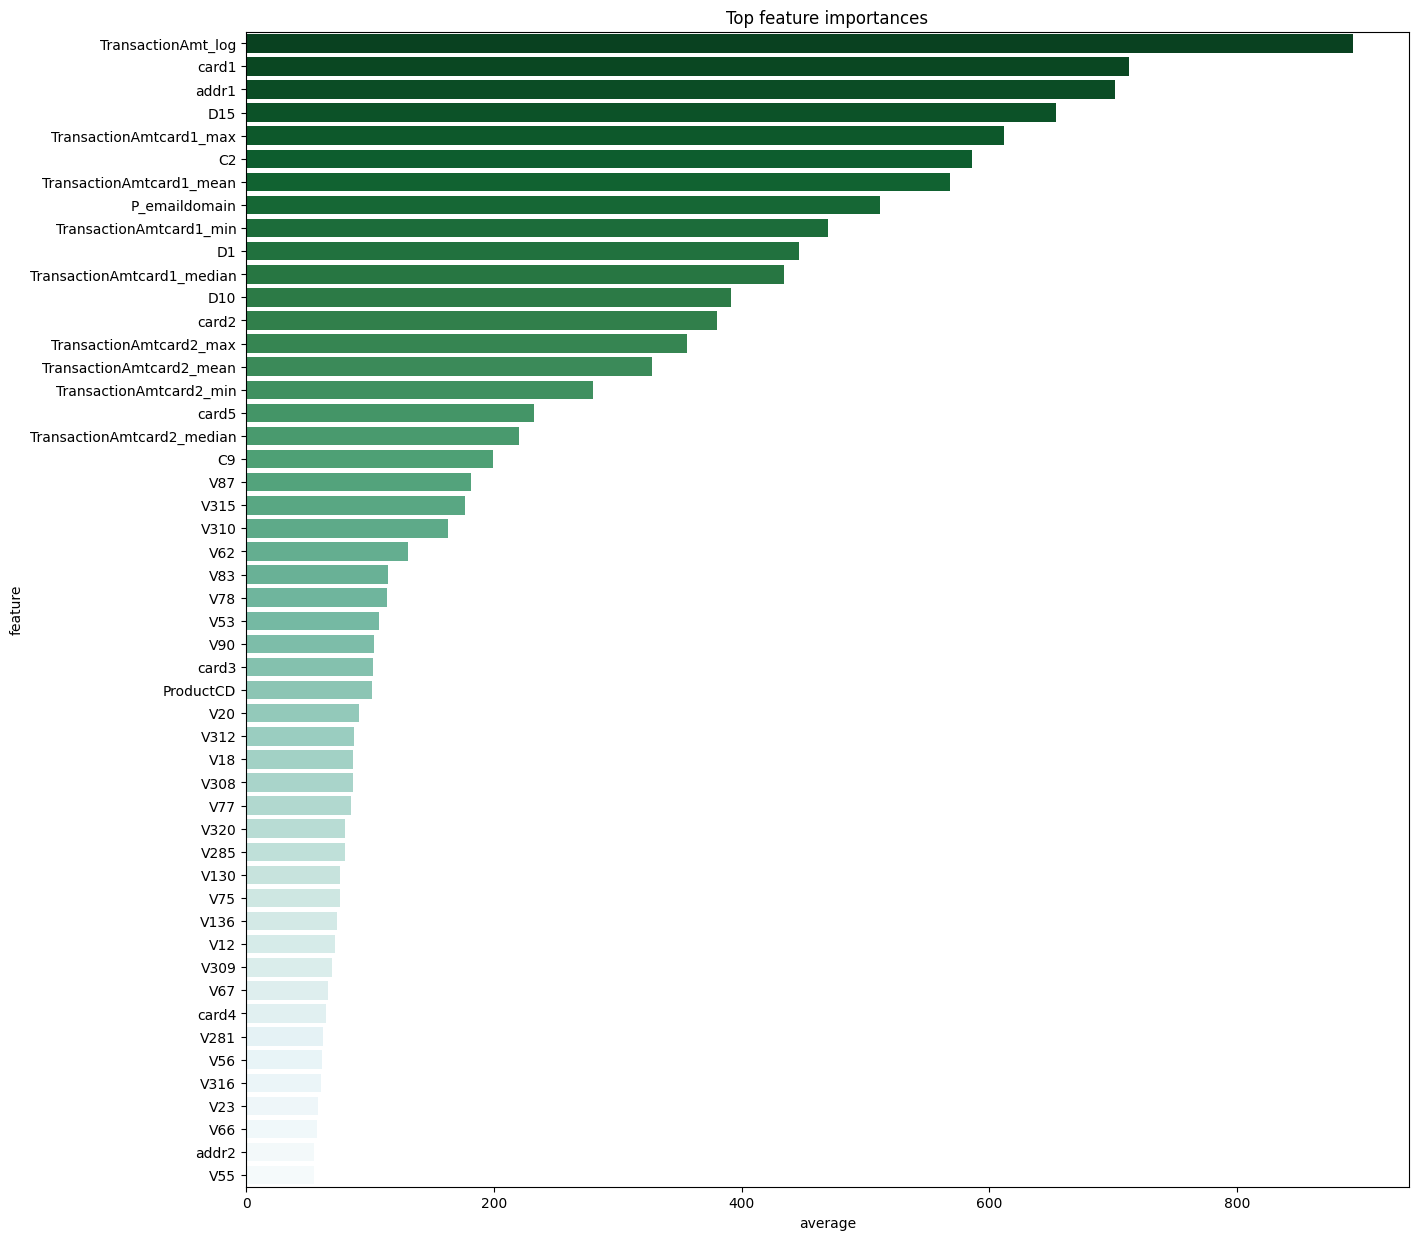

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")
plt.title('Top feature importances')
plt.show()

In [ ]:
final_pred = np.average(test_preds, axis=0)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': final_pred})
sub.to_csv('submission_lgb_le.csv', index=False)

In [ ]:
sub

,TransactionID,isFraud
0,3404559,0.003395
1,3404560,0.036516
2,3404561,0.009326
3,3404562,0.001017
4,3404563,0.537633
...,...,...
172976,3577535,0.004453
172977,3577536,0.011141
172978,3577537,0.002056
172979,3577538,0.023985


Качество на лидерборде 0.90048. Своя кодировка немного улучшила

In [ ]:
# catboost
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

params = {
    'objective': 'Logloss',  # Задача бинарной классификации
    'eval_metric': 'AUC',
    'iterations': 500,
    'learning_rate': 0.05,
    'depth': 6,
    'random_seed': 13,
    'early_stopping_rounds': 200,
}

# Массив для оценки AUC
scores = []

# Создаём DataFrame для важности признаков
feature_importances = pd.DataFrame()
feature_importances['feature'] = df_train_cut_le.columns.drop('isFraud')

test_preds = []

categorical_cols = df_train_cut_le.select_dtypes(include='category').columns.tolist()

for i in range(len(folds_idx)):
    X_train = df_train_cut_le.drop(folds_idx[i], axis=0)
    y_train = X_train['isFraud'].values
    X_val = df_train_cut_le.iloc[folds_idx[i]]
    y_val = X_val['isFraud'].values

    X_train = X_train.drop('isFraud', axis=1)
    X_val = X_val.drop('isFraud', axis=1)

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, cat_features=categorical_cols, eval_set=(X_val, y_val))

    feature_importances['fold_{}'.format(i)] = model.get_feature_importance()

    y_pred = model.predict_proba(X_val)[:, 1]
    score_fold = roc_auc_score(y_val, y_pred)
    scores.append(score_fold)

    y_test_pred = model.predict_proba(df_test_le)[:, 1]
    test_preds.append(y_test_pred)

for i in range(len(scores)):
    print(f'Fold {i}, AUC-ROC: {scores[i]:.5f}')

print(f'CV AUC-ROC: {np.mean(scores):.5f}')

In [ ]:
for i in range(len(scores)):
    print(f'Fold {i}, AUC-ROC: {scores[i]:.5f}')

print(f'CV AUC-ROC: {np.mean(scores):.5f}')

Fold 0, AUC-ROC: 0.86173
Fold 1, AUC-ROC: 0.91668
Fold 2, AUC-ROC: 0.91320
Fold 3, AUC-ROC: 0.89713
CV AUC-ROC: 0.89718


In [ ]:
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3
0,ProductCD,4.514224,4.475383,4.976660,6.164998
1,card1,7.348360,6.306813,6.318586,7.584334
2,card2,2.345824,2.399924,2.221895,1.433240
3,card3,1.457006,1.011355,1.430322,1.024442
4,card4,0.057109,0.019897,0.084373,0.062618


In [ ]:
fold_cols = [col for col in feature_importances.columns if col.startswith('fold_')]
feature_importances['average'] = feature_importances[fold_cols].mean(axis=1)
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3,average
0,ProductCD,4.514224,4.475383,4.976660,6.164998,5.032816
1,card1,7.348360,6.306813,6.318586,7.584334,6.889523
2,card2,2.345824,2.399924,2.221895,1.433240,2.100221
3,card3,1.457006,1.011355,1.430322,1.024442,1.230781
4,card4,0.057109,0.019897,0.084373,0.062618,0.055999


<ipython-input-296-38e95bf7c8d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")


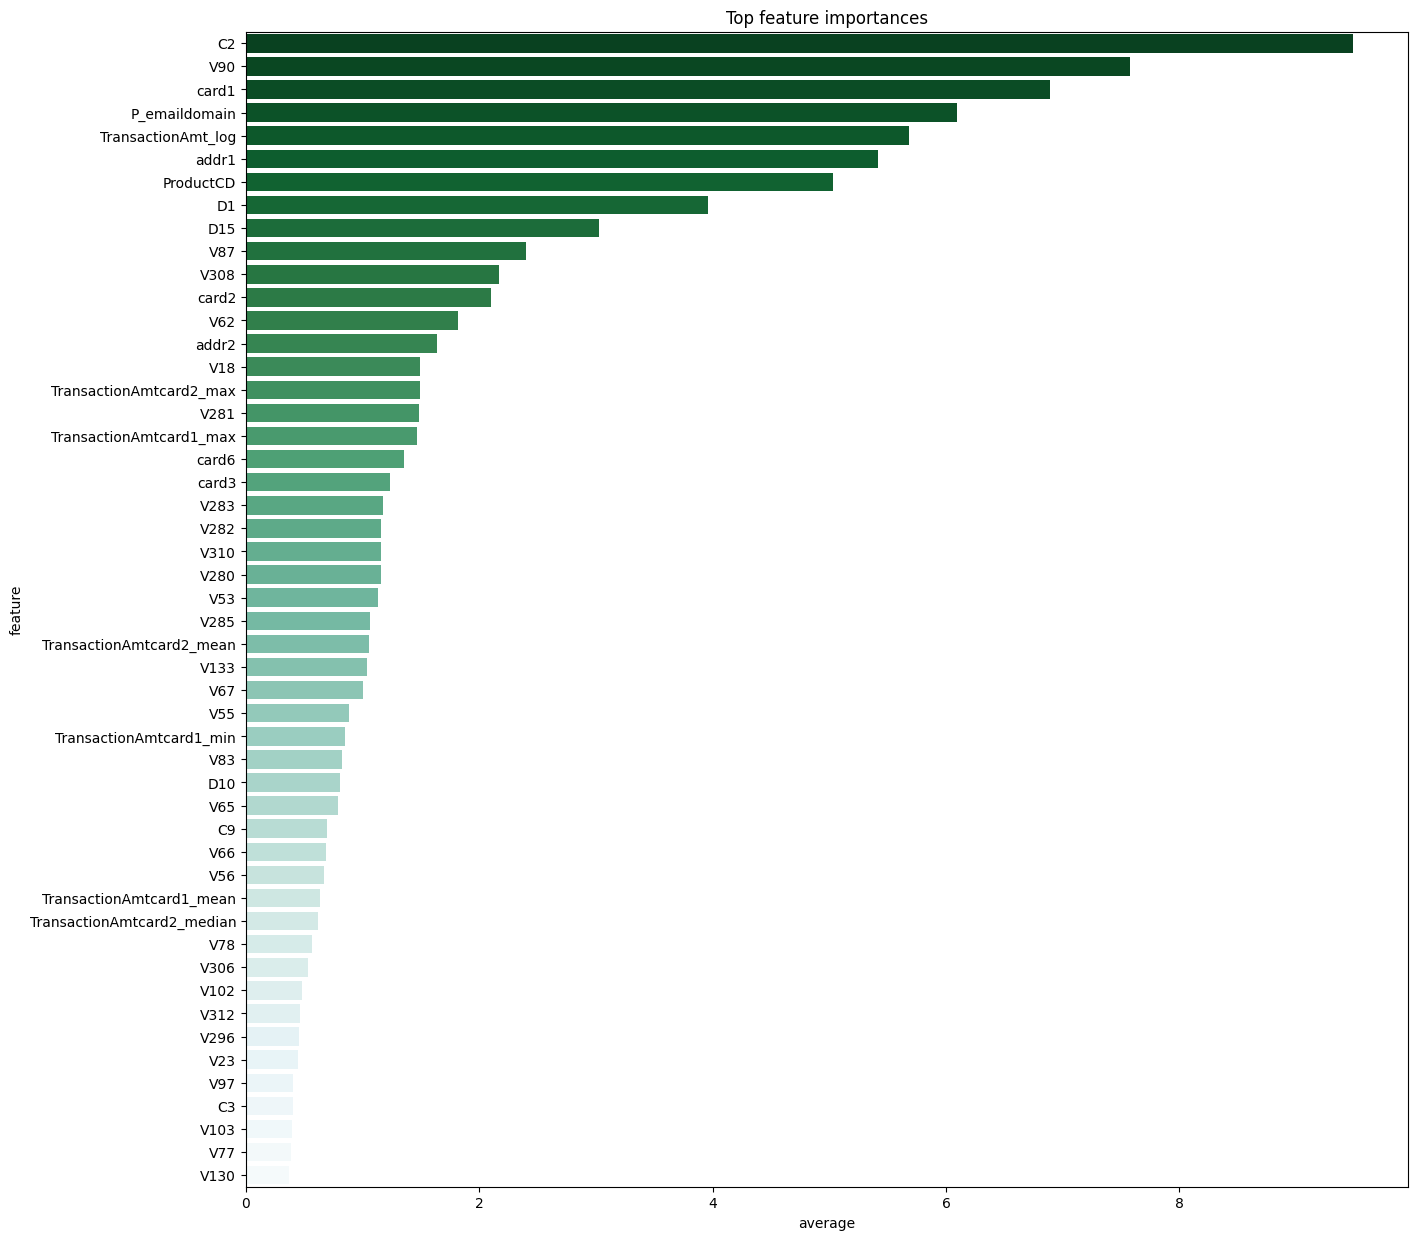

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")
plt.title('Top feature importances')
plt.show()

In [ ]:
final_pred = np.average(test_preds, axis=0)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': final_pred})
sub.to_csv('submission_catboost_le.csv', index=False)

In [ ]:
# Только на этой моделе подумала, что можно как-то по другому валидировать рещультат предсказания.
# Попробовала так, чуть-чуть улучшает на лидерборде, не стала пересчитывать предыдущие модели
# вес на количество наблюдений в каждом фолде
fold_sizes = []

for fold in folds_idx:
    fold_sizes.append(len(fold))

weights = np.array(fold_sizes) / np.sum(fold_sizes)
weighted_pred = np.average(test_preds, axis=0, weights=weights)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': weighted_pred})
sub.to_csv('submission_catboost_le_weight.csv', index=False)

In [ ]:
sub

,TransactionID,isFraud
0,3404559,0.004516
1,3404560,0.030288
2,3404561,0.008093
3,3404562,0.011741
4,3404563,0.755883
...,...,...
172976,3577535,0.003244
172977,3577536,0.010880
172978,3577537,0.002746
172979,3577538,0.011399


Качество на лидерборде 0.90461

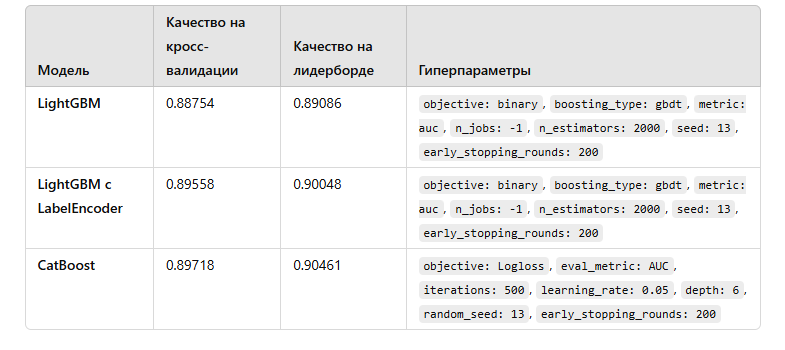

CatBoost имеет наилучшее качество на кросс-валидации и лидерборде, возможно это связано с более эффективной работай с категориальными признаками, которые имеют наибольшую важность в моделях.

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

In [ ]:
# Можно использовать наверное какие-то методы кластеризации,
# но я подумала, что в данной задаче выбросы в первую очередь - аномальные значения, которые могут указывать на фрод
# Добавим столбец, где для каждого наблюдения будет количество колонок с выбросами
def calculate_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

lower_bound, upper_bound = calculate_outlier(df_train_cut.select_dtypes(exclude='category').drop(columns=['isFraud']))

def count_outliers(df, lower_bound, upper_bound):
    outliers = (df < lower_bound) | (df > upper_bound)

    outliers_count = outliers.sum(axis=1)

    return outliers_count

df_train_cut['outliers_count'] = count_outliers(df_train_cut.select_dtypes(exclude='category').drop(columns=['isFraud']), lower_bound, upper_bound)
df_test['outliers_count'] = count_outliers(df_test.select_dtypes(exclude='category'), lower_bound, upper_bound)

In [ ]:
# Добавим также + к счетчику, если в категорильных столбцах класс, составляющий меньше 1% от данных
def add_categorical_outliers(df_train, df_test):
    categorical_columns = df_train.select_dtypes(include=['category', 'object']).columns

    for column in categorical_columns:
        category_counts = df_train[column].value_counts(normalize=True)
        rare_categories = category_counts[category_counts < 0.01].index
        df_train['outliers_count'] += df_train[column].isin(rare_categories).astype(int)
        df_test['outliers_count'] += df_test[column].isin(rare_categories).astype(int)

    return df_train, df_test

df_train_cut, df_test = add_categorical_outliers(df_train_cut, df_test)

In [ ]:
# Возможно пропуски в данных тоже несут смысл и это какая-то поытка скрыть мошенничество.
# Также для каждого наблюдения для числовых столбцов посчитаем количество np.nan, а для категориальных missing
def count_missing(df):
    numeric_missing = df.select_dtypes(include=['number']).isna().sum(axis=1)
    categorical_missing = (df.select_dtypes(include=['category', 'object']) == 'missing').sum(axis=1)
    total_missing = numeric_missing + categorical_missing

    return total_missing

df_train_cut['nan_count'] = count_missing(df_train_cut)
df_test['nan_count'] = count_missing(df_test)

In [ ]:
# Построим модель с этими столбцами
# Для моделей закодируем категориальные признаки LabelEncoder
from sklearn.preprocessing import LabelEncoder
df_train_cut_le = df_train_cut.copy()
df_test_le = df_test.copy()
for col in df_train_cut.select_dtypes(include='category').columns:
        le = LabelEncoder()
        le.fit(list(df_train[col]) + list(df_test[col]))
        df_train_cut_le[col] = le.transform(df_train[col])
        df_test_le[col] = le.transform(df_test[col])
        df_train_cut_le[col] = df_train_cut_le[col].astype('category')
        df_test_le[col] = df_test_le[col].astype('category')

In [ ]:
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'n_estimators': 2000,
    'seed': 13,
    'early_stopping_rounds': 200,
}

scores = []

feature_importances = pd.DataFrame()
feature_importances['feature'] = df_train_cut_le.columns.drop('isFraud')

test_preds = []

for i in range(len(folds_idx)):
    X_train = df_train_cut_le.drop(folds_idx[i], axis=0)
    y_train = X_train['isFraud'].values
    X_val = df_train_cut_le.iloc[folds_idx[i]]
    y_val = X_val['isFraud'].values
    X_train = X_train.drop('isFraud', axis=1)
    X_val = X_val.drop('isFraud', axis=1)

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    lgb_model = lgb.train(params, lgb_train, valid_sets=lgb_eval)

    feature_importances['fold_{}'.format(i)] = lgb_model.feature_importance()

    y_pred = lgb_model.predict(X_val)
    score_fold = roc_auc_score(y_val, y_pred)
    scores.append(score_fold)
    y_test_pred = lgb_model.predict(df_test_le)
    test_preds.append(y_test_pred)

for i in range(len(scores)):
    print('Fold {}, AUC-ROC: {:.5f}'.format(i, scores[i]))
print('CV AUC-ROC: {:.5f}'.format(np.mean(scores)))

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11240, number of negative: 266729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.209923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13842
[LightGBM] [Info] Number of data points in the train set: 277969, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040436 -> initscore=-3.166754
[LightGBM] [Info] Start training from score -3.166754
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[451]	valid_0's auc: 0.860623


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11077, number of negative: 310517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.290100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14180
[LightGBM] [Info] Number of data points in the train set: 321594, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034444 -> initscore=-3.333368
[LightGBM] [Info] Start training from score -3.333368
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[415]	valid_0's auc: 0.907412


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 10979, number of negative: 307852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.236836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14215
[LightGBM] [Info] Number of data points in the train set: 318831, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034435 -> initscore=-3.333635
[LightGBM] [Info] Start training from score -3.333635
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.904679


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 10627, number of negative: 299527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.229935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14223
[LightGBM] [Info] Number of data points in the train set: 310154, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034264 -> initscore=-3.338807
[LightGBM] [Info] Start training from score -3.338807
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.884545
Fold 0, AUC-ROC: 0.86062
Fold 1, AUC-ROC: 0.90741
Fold 2, AUC-ROC: 0.90468
Fold 3

In [ ]:
fold_cols = [col for col in feature_importances.columns if col.startswith('fold_')]
feature_importances['average'] = feature_importances[fold_cols].mean(axis=1)
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3,average
0,ProductCD,50,40,29,19,34.5
1,card1,3139,3140,1420,607,2076.5
2,card2,309,226,111,50,174.0
3,card3,47,38,17,2,26.0
4,card4,0,0,0,0,0.0


<ipython-input-358-38e95bf7c8d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")


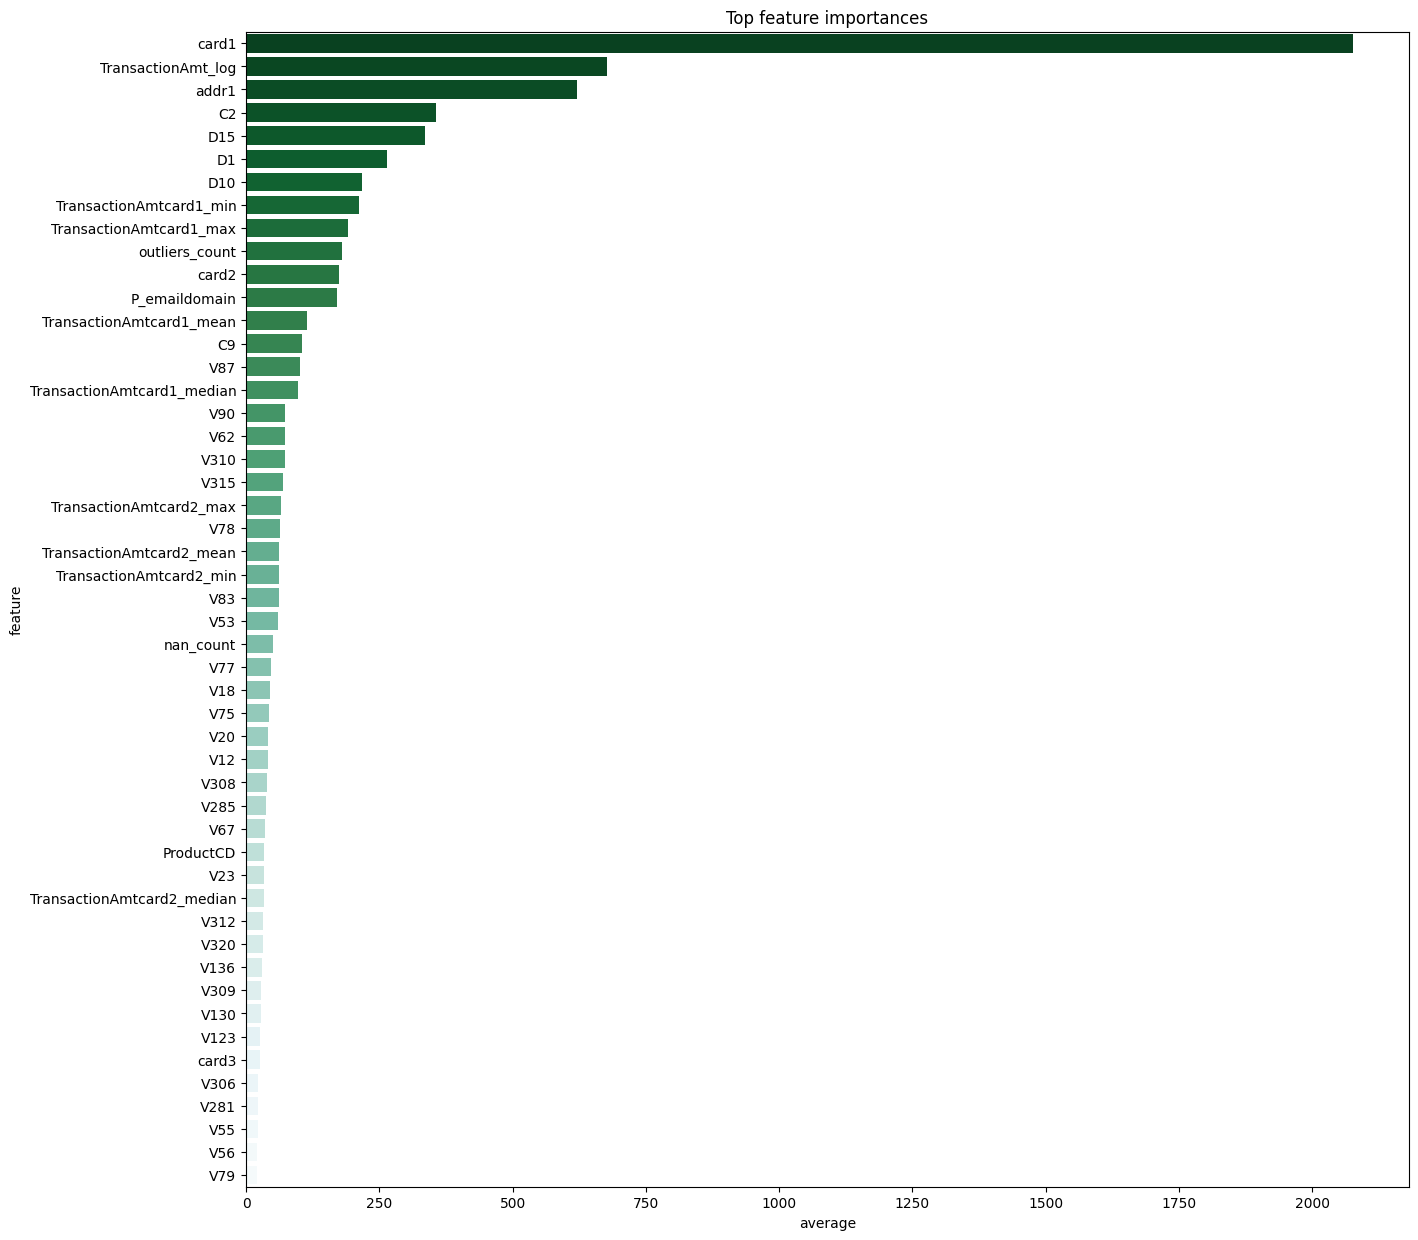

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")
plt.title('Top feature importances')
plt.show()

In [ ]:
fold_sizes = []

for fold in folds_idx:
    fold_sizes.append(len(fold))

weights = np.array(fold_sizes) / np.sum(fold_sizes)
weighted_pred = np.average(test_preds, axis=0, weights=weights)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': weighted_pred})
sub.to_csv('submission_le_outler.csv', index=False)

на лидрборде качество 0.89105. Хуже катбуста lgbd без этих колонок. Но при этом outliers_count в топ 10 фич по feature_importance.

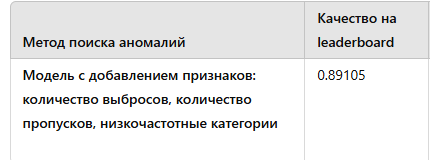

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или isFraud-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

In [ ]:
# Заполним пропуски числом. Не очень логичный постфикс, но лучше в голову не пришло
df_train_cut_na = df_train_cut_le.copy()
df_train_cut_na[df_train_cut_na.select_dtypes(exclude='category').columns] = (
    df_train_cut_na.select_dtypes(exclude='category').fillna(999999)
)

df_test_na = df_test_le.copy()
df_test_na[df_test_na.select_dtypes(exclude='category').columns] = (
    df_test_na.select_dtypes(exclude='category').fillna(999999)
)

In [ ]:
# Используем MiniBatchKMeans. Возьмем два кластера, в надежде что удачно найдет фрод
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
def minibatch_kmeans(df_train, df_test, n_clusters=2):
    df_train_numeric = df_train.select_dtypes(include=['number']).drop(columns=['isFraud'], errors='ignore')
    df_test_numeric = df_test.select_dtypes(include=['number'])

    scaler = StandardScaler()
    df_train_scaled = scaler.fit_transform(df_train_numeric)
    df_test_scaled = scaler.transform(df_test_numeric)

    mini_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=100)
    df_train['mini_kmeans_cluster'] = mini_kmeans.fit_predict(df_train_scaled)
    df_test['mini_kmeans_cluster'] = mini_kmeans.predict(df_test_scaled)

    return df_train, df_test

df_train_cut_na, df_test_na = minibatch_kmeans(df_train_cut_na, df_test_na)

In [ ]:
# Для дальнейших методов снизим размерность в данных для ускорения обучения
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train_cut_na.drop(columns=['isFraud']))
X_test_scaled = scaler.transform(df_test_na)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Не разобралась как в DBSCAN / HDBSCAN кластеры с train применять к test
# Использую GaussianMixture
import pandas as pd
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train_pca)

train_clusters = gmm.predict(X_train_pca)
test_clusters = gmm.predict(X_test_pca)

df_train_clusters = pd.DataFrame(train_clusters, columns=['cluster'])
df_test_clusters = pd.DataFrame(test_clusters, columns=['cluster'])

df_train_ohe = pd.get_dummies(df_train_clusters, columns=['cluster'], prefix='cluster', dtype=int)
df_test_ohe = pd.get_dummies(df_test_clusters, columns=['cluster'], prefix='cluster', dtype=int)

df_train_final = pd.concat([df_train_cut_na, df_train_ohe], axis=1)
df_test_final = pd.concat([df_test_na, df_test_ohe], axis=1)

In [ ]:
# Попробуем обучить модель на данных с новыми колонками
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'n_estimators': 2000,
    'seed': 13,
    'early_stopping_rounds': 200,
}

scores = []

feature_importances = pd.DataFrame()
feature_importances['feature'] = df_train_final.columns.drop('isFraud')

test_preds = []

for i in range(len(folds_idx)):
    X_train = df_train_final.drop(folds_idx[i], axis=0)
    y_train = X_train['isFraud'].values
    X_val = df_train_final.iloc[folds_idx[i]]
    y_val = X_val['isFraud'].values
    X_train = X_train.drop('isFraud', axis=1)
    X_val = X_val.drop('isFraud', axis=1)

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    lgb_model = lgb.train(params, lgb_train, valid_sets=lgb_eval)

    feature_importances['fold_{}'.format(i)] = lgb_model.feature_importance()

    y_pred = lgb_model.predict(X_val)
    score_fold = roc_auc_score(y_val, y_pred)
    scores.append(score_fold)
    y_test_pred = lgb_model.predict(df_test_final)
    test_preds.append(y_test_pred)

for i in range(len(scores)):
    print('Fold {}, AUC-ROC: {:.5f}'.format(i, scores[i]))
print('CV AUC-ROC: {:.5f}'.format(np.mean(scores)))

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11240, number of negative: 266729
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.383419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13830
[LightGBM] [Info] Number of data points in the train set: 277969, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040436 -> initscore=-3.166754
[LightGBM] [Info] Start training from score -3.166754
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[537]	valid_0's auc: 0.858962


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11077, number of negative: 310517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.254420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14165
[LightGBM] [Info] Number of data points in the train set: 321594, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034444 -> initscore=-3.333368
[LightGBM] [Info] Start training from score -3.333368
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[316]	valid_0's auc: 0.904796


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 10979, number of negative: 307852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.238327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14202
[LightGBM] [Info] Number of data points in the train set: 318831, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034435 -> initscore=-3.333635
[LightGBM] [Info] Start training from score -3.333635
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.899468


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 10627, number of negative: 299527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.238655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14212
[LightGBM] [Info] Number of data points in the train set: 310154, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034264 -> initscore=-3.338807
[LightGBM] [Info] Start training from score -3.338807
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.87899
Fold 0, AUC-ROC: 0.85896
Fold 1, AUC-ROC: 0.90480
Fold 2, AUC-ROC: 0.89947
Fold 3,

In [ ]:
fold_cols = [col for col in feature_importances.columns if col.startswith('fold_')]
feature_importances['average'] = feature_importances[fold_cols].mean(axis=1)
feature_importances.head()

,feature,fold_0,fold_1,fold_2,fold_3,average
0,ProductCD,53,34,23,17,31.75
1,card1,3517,2809,1013,735,2018.50
2,card2,336,232,78,65,177.75
3,card3,50,34,13,2,24.75
4,card4,0,0,0,0,0.00


<ipython-input-74-38e95bf7c8d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")


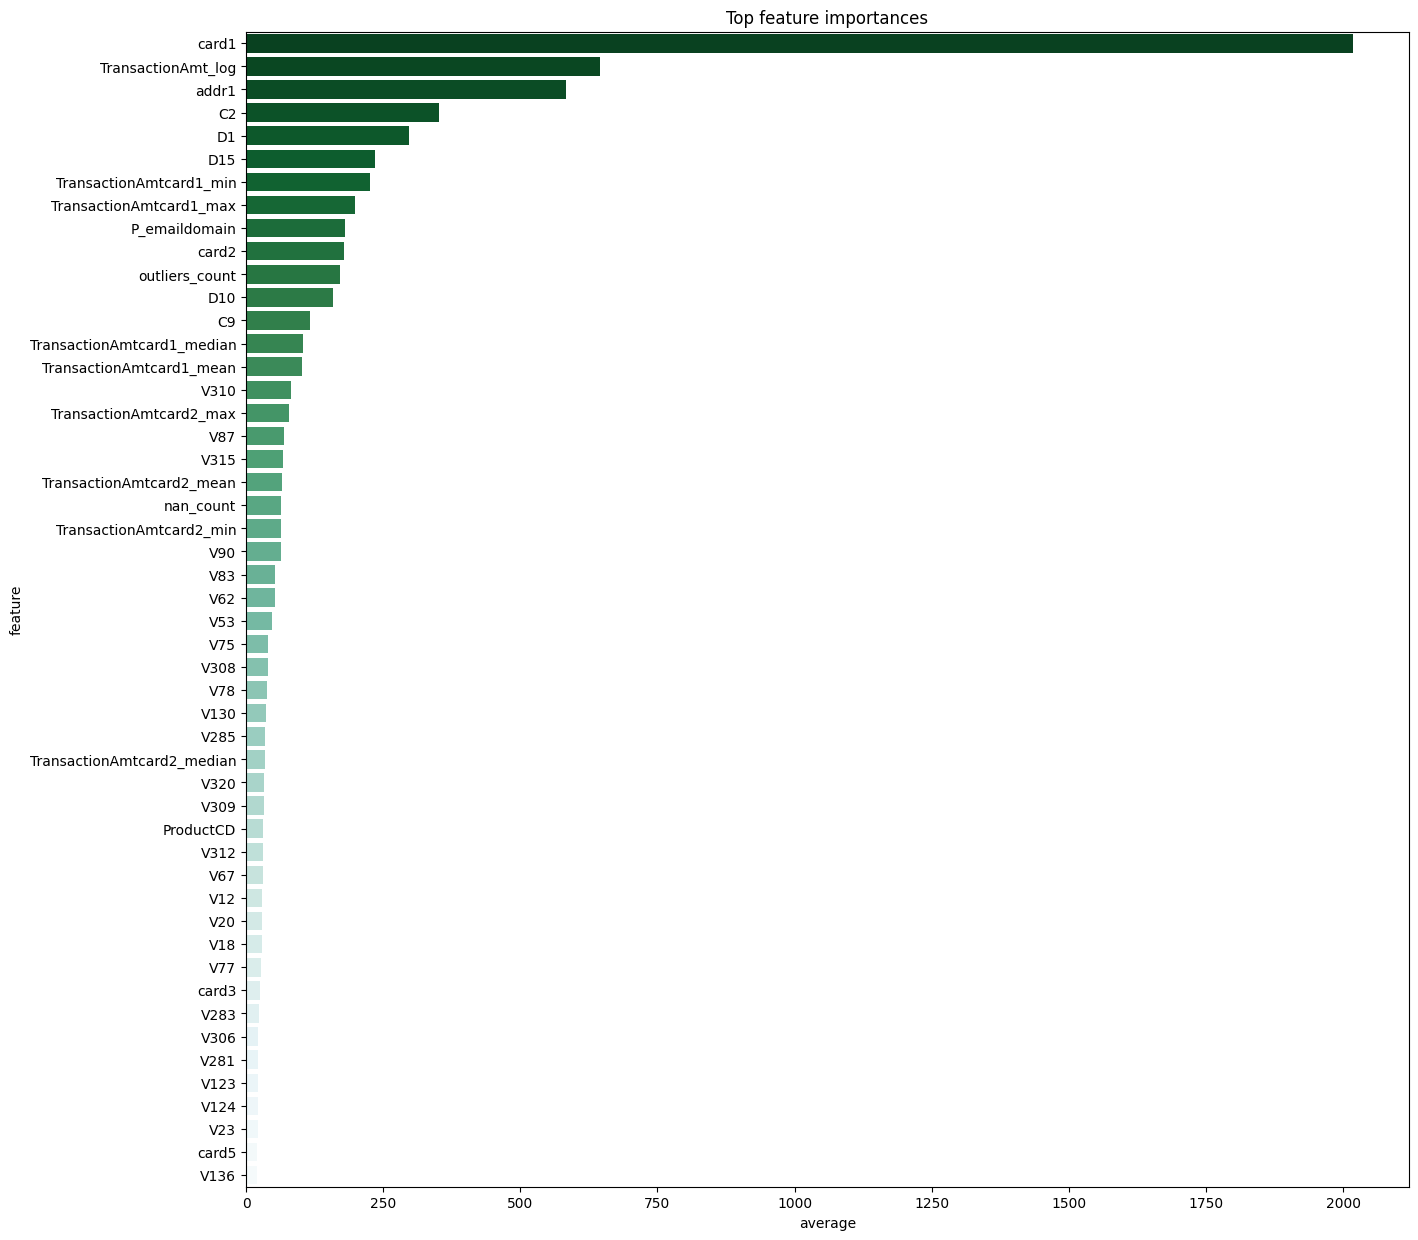

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature', palette="BuGn_r")
plt.title('Top feature importances')
plt.show()

In [ ]:
fold_sizes = []

for fold in folds_idx:
    fold_sizes.append(len(fold))

weights = np.array(fold_sizes) / np.sum(fold_sizes)
weighted_pred = np.average(test_preds, axis=0, weights=weights)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': weighted_pred})
sub.to_csv('submission_claster.csv', index=False)

Видно что кластеры не входят в важные признаки и что качество модели уступает лучшей (я не удивлена, применила самое простое, вероятно хорошо не распределило данные и наоборот добавило шум). Но при этом качество все равно достаточно высокое и на лидерборде 0.89171, что уступает только катбусту.

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

In [ ]:
pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 18 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_sufycw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.703 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train_h2o = h2o.H2OFrame(df_train_cut)
test_h2o = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target = "isFraud"
train_h2o[target] = train_h2o[target].asfactor()
features = train_h2o.columns
features.remove(target)

In [ ]:
aml = H2OAutoML(max_models=10, seed=1, max_runtime_secs=600)
aml.train(x=features, y=target, training_frame=train_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_3_20250314_202652


Model Summary: 
    number_of_trees
--  -----------------
    75

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.010850557460230989
RMSE: 0.10416600914036685
LogLoss: 0.04441359093173268
Mean Per-Class Error: 0.1133467521181568
AUC: 0.9847435814153452
AUCPR: 0.8752138392856682
Gini: 0.9694871628306905

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2632055322711284
       0       1     Error    Rate
-----  ------  ----  -------  -----------------
0      274757  1324  0.0048   (1324.0/276081.0)
1      2280    7995  0.2219   (2280.0/10275.0)
Total  277037  9319  0.0126   (3604.0/286356.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.263206     0.816066  201
max f2                       0.154443     0.809126  239
max f0point5                 0.43782      0.876489  154
max accuracy                 0.311888     0.987788  187
max precision                0.998179     1         0
max recall                   0.00087551   1         395
max specificity              0.998179     1         0
max absolute_mcc             0.311888     0.812202  187
max min_per_class_accuracy   0.0456163    0.934986  310
max mean_per_class_accuracy  0.0503516    0.935958  304
max tns                      0.998179     276081    0
max fns                      0.998179     10148     0
max fps                      0.000177943  276081    399
max tps                      0.00087551   10275     395
max tnr                      0.998179     1         0
max fnr                      0.998179     0.98764   0
max fpr                      0.000177943  1         399
max tpr                      0.00087551   1         395

Gains/Lift Table: Avg response rate:  3.59 %, avg score:  3.60 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100015                   0.928108           27.7816      27.7816            0.996858         0.970862     0.996858                    0.970862            0.277859        0.277859                   2678.16   2678.16            0.277826
2        0.0200031                   0.688073           26.8669      27.3243            0.964036         0.82851      0.980447                    0.899686            0.26871         0.546569                   2586.69   2632.43            0.546164
3        0.0300011                   0.314658           20.1207      24.9236            0.72197          0.489893     0.894308                    0.76312             0.201168        0.747737                   1912.07   2392.36            0.744448
4        0.0400027                   0.168968           7.87227      20.6604            0.282472         0.228633     0.741336                    0.629487            0.0787348       0.826472                   687.227   1966.04            0.81574
5        0.0500007                   0.112658           3.97158      17.3234            0.142508         0.137607     0.621595                    0.531131            0.039708        0.86618                    297.158   1632.34            0.846555
6        0.100001                    0.0428618          1.44815      9.38576            0.0519626        0.0673739    0.336779                    0.299253            0.0724088       0.938589                   44.8155   838.576            0.869797
7        0.150002                

In [ ]:
# Лучшая модель XGBoost
best_model = aml.leader

In [ ]:
test_preds = best_model.predict(test_h2o)
probabilities = test_preds.as_data_frame()["p1"]

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# Создаем DataFrame для отправки
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': probabilities})
# Сохраняем в CSV файл
sub.to_csv('submission_auto.csv', index=False)

Качество на кагле 0.87582. Что хуже всех обученных мной моделей, стоит учесть, что я обучала h2o не на всех данных, а на данных после обработки, что очевидно также сыграло свою роль. (в чате писали, что качество на всех данных при h2o получается 0,8, что хуже моей лучшей модели).

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

In [ ]:
# Для моделей закодируем категориальные признаки LabelEncoder
from sklearn.preprocessing import LabelEncoder
df_train_cut_le = df_train_cut.copy()
df_test_le = df_test.copy()
for col in df_train_cut.select_dtypes(include='category').columns:
        le = LabelEncoder()
        le.fit(list(df_train[col]) + list(df_test[col]))
        df_train_cut_le[col] = le.transform(df_train[col])
        df_test_le[col] = le.transform(df_test[col])
        df_train_cut_le[col] = df_train_cut_le[col].astype('category')
        df_test_le[col] = df_test_le[col].astype('category')

In [ ]:
# неуверена, что инференс надо было считать так, но я посчитала по всем фолдам и усреднила
import time
import lightgbm as lgb

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'n_estimators': 2000,
    'seed': 13,
    'early_stopping_rounds': 200,
}

scores = []

feature_importances = pd.DataFrame()
feature_importances['feature'] = df_train_cut_le.columns.drop('isFraud')

test_preds = []

start_train_time = time.time()

inference_times = []

for i in range(len(folds_idx)):
    X_train = df_train_cut_le.drop(folds_idx[i], axis=0)
    y_train = X_train['isFraud'].values
    X_val = df_train_cut_le.iloc[folds_idx[i]]
    y_val = X_val['isFraud'].values
    X_train = X_train.drop('isFraud', axis=1)
    X_val = X_val.drop('isFraud', axis=1)

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

    lgb_model = lgb.train(params, lgb_train, valid_sets=lgb_eval)

    feature_importances['fold_{}'.format(i)] = lgb_model.feature_importance()

    y_pred = lgb_model.predict(X_val)
    score_fold = roc_auc_score(y_val, y_pred)
    scores.append(score_fold)

    # Замер времени инференса
    start_infer_time = time.time()
    y_test_pred = lgb_model.predict(df_test_le)
    test_preds.append(y_test_pred)
    end_infer_time = time.time()

    inference_time_fold = end_infer_time - start_infer_time
    inference_times.append(inference_time_fold)
    print(f"Fold {i} inference time: {inference_time_fold:.2f} секунд")

end_train_time = time.time()

train_time = end_train_time - start_train_time

# Среднее время инференса по всем фолдам
average_infer_time = np.mean(inference_times)

print(f"CV AUC-ROC: {np.mean(scores):.5f}")
print(f"Время обучения модели: {train_time:.2f} секунд")
print(f"Среднее время инференса по фолдам: {average_infer_time:.2f} секунд")

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11240, number of negative: 266729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.482223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13761
[LightGBM] [Info] Number of data points in the train set: 277969, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040436 -> initscore=-3.166754
[LightGBM] [Info] Start training from score -3.166754
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[525]	valid_0's auc: 0.859022
Fold 0 inference time: 12.96 секунд


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 11077, number of negative: 310517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.241722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14099
[LightGBM] [Info] Number of data points in the train set: 321594, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034444 -> initscore=-3.333368
[LightGBM] [Info] Start training from score -3.333368
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[298]	valid_0's auc: 0.905613
Fold 1 inference time: 8.59 секунд


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 10979, number of negative: 307852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.240754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14137
[LightGBM] [Info] Number of data points in the train set: 318831, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034435 -> initscore=-3.333635
[LightGBM] [Info] Start training from score -3.333635
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.903433
Fold 2 inference time: 2.31 секунд


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 10627, number of negative: 299527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.403489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14142
[LightGBM] [Info] Number of data points in the train set: 310154, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034264 -> initscore=-3.338807
[LightGBM] [Info] Start training from score -3.338807
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.882093
Fold 3 inference time: 1.29 секунд
CV AUC-ROC: 0.88754
Время обучения модели: 211

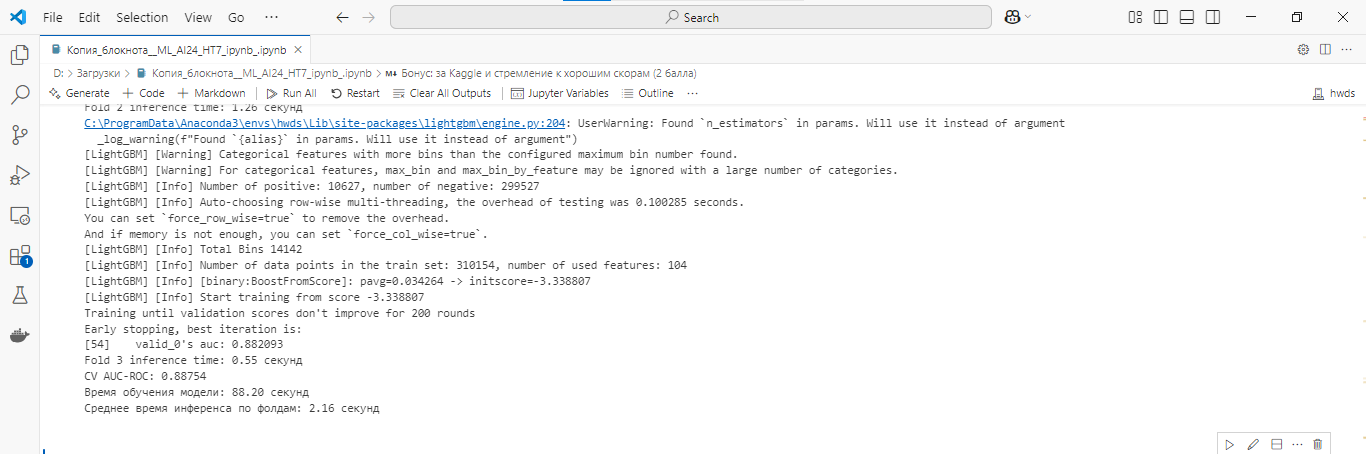

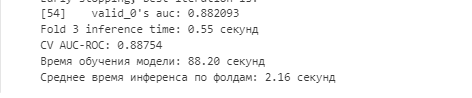

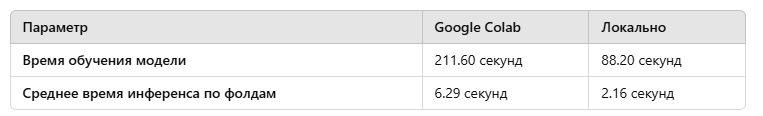

Самая лучшая по скору модель катбуст слишком долгая для переобучения заново. Сравнила на второй по качеству LightGBM с labelecoding.
Обучила локально.
Неожиданно локально отработало быстрее чем в 2 раза. Возможно LightGBM как-то оптимизирован для эффективного использования возможностей устройства.

(Чат гпт говорит следующее: LightGBM использует многозадачность, что позволяет эффективно распределять вычисления по всем доступным ядрам процессора.)

В колабе по умолчанию нет многопоточности поэтому время работ дольше.

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

In [ ]:
# не забудьте прикрепить скриншоты лидерборда, пожалуйста

Мысли и впечатления: очень классная домашка, лучшая, что была. К сожалению наложилось все на конец модуля и где-то (в кластеризации например) пришлось жертвовать экспериментами ради простоты из-за ограничения по времени. Из грустного не удалось перебить бейзлайн (https://colab.research.google.com/drive/1pg1xZa8koJeUaZA35e7g1ISGqNlHDHZW), позаимствовала оттуда некоторые признаки. Пока не на таком крутом уровне в feature engenireeng, некоторые признаки даже сложно подумать как могли придти в голову.

Последнее дз на курсе сделано!!! 🎉🎉🎉